<a href="https://colab.research.google.com/github/mindyng/Covid19/blob/master/NLP_Profiler_for_Hydroxychloroquine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U emoji

     |████████████████████████████████| 51kB 1.9MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=07f91a6c7ea116047156255fe9a4bd4475f7557e039693db24295c0ae49d508c
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [2]:
!pip install -U nltk

     |████████████████████████████████| 1.4MB 3.4MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434673 sha256=8ec4a63aa0267a2141267ca878cbee89962d0a174a926873cd27b9d88ddc9804
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [3]:
!pip install -U textblob

Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)


In [4]:
%%time
%%bash

if [[ -e ../../library/org/neomatrix369 ]]; then
  echo "Library source found"
  
  cd ../../build
else
  if [[ -e awesome-ai-ml-dl/examples/better-nlp/library ]]; then
     echo "Library source found"
  else
     git clone "https://github.com/neomatrix369/awesome-ai-ml-dl" || true
  fi

  echo "Library source exists"
  cd awesome-ai-ml-dl/examples/better-nlp/
fi
pwd

Library source exists
/content/awesome-ai-ml-dl/examples/better-nlp


Cloning into 'awesome-ai-ml-dl'...


CPU times: user 1.46 ms, sys: 5.68 ms, total: 7.14 ms
Wall time: 5.21 s


In [5]:
import sys
import os

sys.path.insert(0, '../../library') # we need this when running inside the Docker container
sys.path.insert(0, 'awesome-ai-ml-dl/examples/better-nlp/library') # we need this when running in Google Colab like environments

from org.neomatrix369.nlp_profiler import apply_text_profiling

import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Various text messages with different content.

In [23]:
text_with_emojis = "🇧🇷 Brazilian hospital system Prevent Senior tackles COVID with the Raoult HCQ+AZI protocol with resounding success 😁"
text_with_a_number = "BREAKING:  Treatment with Hydroxychloroquine Cut Death Rate Significantly  in COVID-19 Patients, Henry Ford Health System Study Shows."
text_with_two_numbers = "A new retrospective study (n=360,000) shows that use of hydroxychloroquine reduces the chance of getting Covid-19 by about 50%."
text_with_punctuations = "Ivermectin Study shows 100% of 60 Patients Better in an Average of Just Under 6 Days. HCQ+AZ also shown effective..."
text_with_a_date = "06/30/20-In Brazil, rather than shut down the economy, they made hydroxychloroquine available for early treatment. The media predicted DOOM. It did not happen and it is not going to happen. This is a flat curve."
text_with_dates = "Tweeted on 06/15/20 and retweeted on 06/26/20: Published studies & case-controlled trials show #Hydroxychloroquine has strong efficacy in early #COVID19. We have ability to save lives. It’s time for Canadians to DEMAND @JustinTrudeau @fordnation govts release 7M+ doses of stockpiled #HCQ & allow MDs to do our job without fear twitter.com/OnCall4ON/stat…."
text_with_duplicates = "NEW Research—No evidence of benefit for #chloroquine and #hydroxychloroquine in #COVID19 patients, urgent randomised trials are needed: finding from a large observational study of nearly 15,000 patients with #COVID19 & 81,000 controls"

In [24]:
data = [text_with_emojis, text_with_a_number, text_with_two_numbers, 
        text_with_punctuations, text_with_a_date, text_with_dates, text_with_duplicates]
text_dataframe = pd.DataFrame(data, columns=['text'])
text_dataframe

,text
0,🇧🇷 Brazilian hospital system Prevent Senior ta...
1,BREAKING: Treatment with Hydroxychloroquine C...
2,"A new retrospective study (n=360,000) shows th..."
3,Ivermectin Study shows 100% of 60 Patients Bet...
4,"06/30/20-In Brazil, rather than shut down the ..."
5,Tweeted on 06/15/20 and retweeted on 06/26/20:...
6,NEW Research—No evidence of benefit for #chlor...


Pandas' familiar describe() function.

In [25]:
text_dataframe.describe()

,text
count,7
unique,7
top,Ivermectin Study shows 100% of 60 Patients Bet...
freq,1


The usual output for describe() are descriptive stat's: count, unique, top, freq, mean, std dev.

Here we do something similar with text with NLP profiler.

In [26]:
profiled_text_dataframe = apply_text_profiling(text_dataframe, 'text')
profiled_text_dataframe

,text,sentiment_polarity_score,sentiment_polarity,sentiment_subjectivity_score,sentiment_subjectivity,spellcheck_score,spelling_quality,sentences_count,characters_count,spaces_count,words_count,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,alpha_numeric_count,non_alpha_numeric_count,punctuations_count,stop_words_count,dates_count
0,🇧🇷 Brazilian hospital system Prevent Senior ta...,0.300000,Positive,0.000000,Very objective,0.742248,Pretty good,1,116,16,16,1,100,2,0,96,20,1,3,0
1,BREAKING: Treatment with Hydroxychloroquine C...,0.375000,Positive,0.875000,Quite subjective,0.761167,Pretty good,2,134,18,17,0,116,0,1,112,22,4,2,0
2,"A new retrospective study (n=360,000) shows th...",0.136364,Positive,0.454545,Objective/subjective,0.858696,Pretty good,2,127,18,18,1,109,0,4,102,25,7,6,0
3,Ivermectin Study shows 100% of 60 Patients Bet...,0.316667,Positive,0.566667,Objective/subjective,0.811406,Pretty good,4,116,19,18,1,97,0,3,91,25,6,4,0
4,"06/30/20-In Brazil, rather than shut down the ...",0.079861,Positive,0.278472,Pretty objective,0.905010,Quite good,5,211,34,35,7,177,0,3,168,43,9,14,0
5,Tweeted on 06/15/20 and retweeted on 06/26/20:...,0.266667,Positive,0.516667,Objective/subjective,0.788777,Pretty good,5,356,50,49,6,306,0,9,284,72,20,14,0
6,NEW Research—No evidence of benefit for #chlor...,0.150216,Positive,0.427706,Objective/subjective,0.756579,Pretty good,1,234,31,28,4,203,0,6,193,41,9,9,0


Looking closely at outputs for sentiment polarity and sentiment subjectivity score:

Text with a date sentence has two negative words and sentiment polarity was still able to classify it correctly as positive. text_with_duplicates is classified as positive which would make sense given the issues the drug has caused. However, this is based on expert knowledge given the controversy it has caused worldwide espeically with retracted paper supporting hydroxychorloquine. Given text alone from above tweet, would expect tweet to be classified as benefit based on "no benefit" in sentence. 


sentiment subjectivity assignment is not very accurate since some objective statements are mixed with subjective classification and subjective classification given on a tweet based on research evidence, not opinion. So there could be more data fed into sentment subjectivity classifier to be more accurate.

Sentiment Analysis

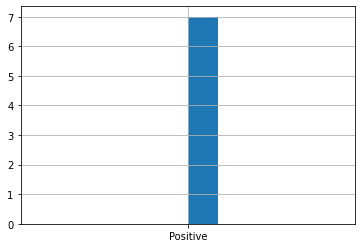

In [27]:
profiled_text_dataframe['sentiment_polarity'].hist()

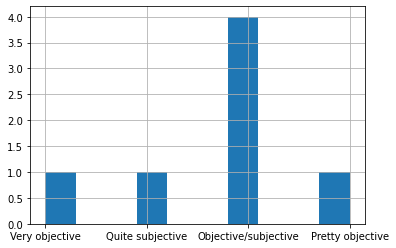

In [28]:
profiled_text_dataframe['sentiment_subjectivity'].hist()

Spelling quality check.

The spelling score and spelling quality check is upto 70% accurate, it's using Peter Norvig’s “How to Write a Spelling Corrector".

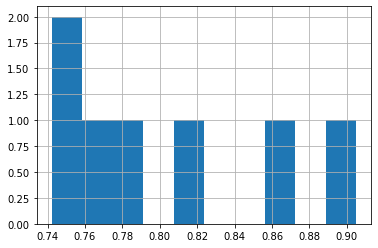

In [29]:
profiled_text_dataframe['spellcheck_score'].hist()

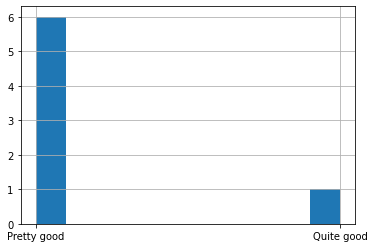

In [30]:
profiled_text_dataframe['spelling_quality'].hist()


Resources:

https://www.kaggle.com/raenish/cheatsheet-text-helper-functions
https://textblob.readthedocs.io/en/dev/quickstart.html